## **200968108 Sec-A 27**
## **Week-1** Representational Learning using Autoencoders.

In [1]:
#Importing required libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split

## **2.Train an autoencoder to detect anomalies usingthe ECG5000 dataset.**
* Plot and observe a normal ECG vs an anomalous ECG.

* Design  and Train  an  autoencoder  on  the  normal  rhythms  only,  then  use  it  to reconstruct all the data.

* The autoencoder is trained using only the normal ECGs, but is evaluated using the full test set. 

* Classify an ECG as anomalous if the reconstruction error is greater than one standard deviation from the normal training examples.  

In [2]:
# Loading the dataset

dataframe = pd.read_csv('http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv', header=None)
raw_data = dataframe.values
dataframe.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


In [3]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Columns: 141 entries, 0 to 140
dtypes: float64(141)
memory usage: 5.4 MB


In [4]:
# loading the labels into a variable
labels = raw_data[:, -1]
# other data points are the electrocadriogram data
ECG_data = raw_data[:, 0:-1]

* Seperating train and test data, and normalizing them

In [5]:
# seperating the data into train and test data
x_train, x_test, y_train, y_test = train_test_split(ECG_data, labels, test_size=0.2, random_state=21)

min_val = tf.reduce_min(x_train)
max_val = tf.reduce_max(x_train)

# Normalization
train_data = (x_train - min_val) / (max_val - min_val)
test_data = (x_test - min_val) / (max_val - min_val)

* Converting the labels into boolean
* Seperating the normal and anomalous data


In [6]:
train_labels = y_train.astype(bool)
test_labels = y_test.astype(bool)

normal_train_data = train_data[train_labels]
normal_test_data = test_data[test_labels]

anomalous_train_data = train_data[~train_labels]
anomalous_test_data = test_data[~test_labels]

### Plotting a Normal ECG

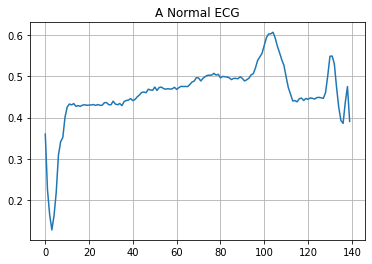

In [7]:
plt.grid()
plt.plot(np.arange(140), normal_train_data[20])
plt.title("A Normal ECG")
plt.show()

### Plotting an anomalous ECG

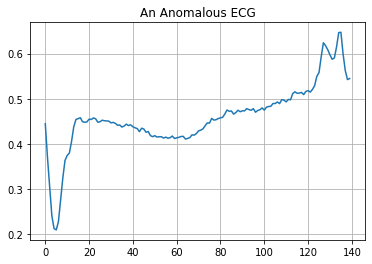

In [8]:
plt.grid()
plt.plot(np.arange(140), anomalous_train_data[20])
plt.title("An Anomalous ECG")
plt.show()

### Building an autoencoder model for Anomaly Detection

In [20]:
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

class detect_anomaly(Model):
  def __init__(self):
    super(detect_anomaly, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Dense(32, activation="relu"),
      layers.Dense(16, activation="relu"),
      layers.Dense(8, activation="relu")])
    
    self.decoder = tf.keras.Sequential([
      layers.Dense(16, activation="relu"),
      layers.Dense(32, activation="relu"),
      layers.Dense(140, activation="sigmoid")])
    
  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

model = detect_anomaly()
model.compile(optimizer='adam', loss='mae')

# using only normal rythms of ecg data to train the model
history = model.fit(normal_train_data, normal_train_data, 
          epochs=100, 
          batch_size=512,
          validation_data=(test_data, test_data),
          shuffle=True)


Epoch 1/100
5/5 [==============================] - 2s 43ms/step - loss: 0.0576 - val_loss: 0.0536
Epoch 2/100
5/5 [==============================] - 0s 15ms/step - loss: 0.0554 - val_loss: 0.0522
Epoch 3/100
5/5 [==============================] - 0s 11ms/step - loss: 0.0524 - val_loss: 0.0502
Epoch 4/100
5/5 [==============================] - 0s 10ms/step - loss: 0.0489 - val_loss: 0.0476
Epoch 5/100
5/5 [==============================] - 0s 10ms/step - loss: 0.0453 - val_loss: 0.0454
Epoch 6/100
5/5 [==============================] - 0s 10ms/step - loss: 0.0414 - val_loss: 0.0434
Epoch 7/100
5/5 [==============================] - 0s 11ms/step - loss: 0.0375 - val_loss: 0.0414
Epoch 8/100
5/5 [==============================] - 0s 11ms/step - loss: 0.0340 - val_loss: 0.0399
Epoch 9/100
5/5 [==============================] - 0s 11ms/step - loss: 0.0311 - val_loss: 0.0386
Epoch 10/100
5/5 [==============================] - 0s 10ms/step - loss: 0.0291 - val_loss: 0.0375
Epoch 11/100
5/5 [=

### Plotting training and validation loss curves

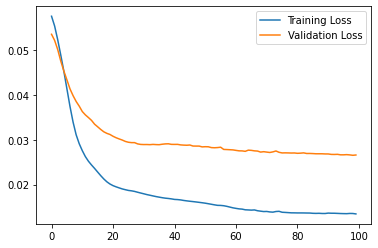

In [21]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()

### Passing the normal and anomalous data into our autoencoder

In [22]:
# normal ECG
normal_encoded = model.encoder(normal_test_data).numpy()
normal_decoded = model.decoder(normal_encoded).numpy()
# anomalous ECG
anomaly_encoded = model.encoder(anomalous_test_data).numpy()
anomaly_decoded = model.decoder(anomaly_encoded).numpy()

###Lets plot the Normal and Anomalous ECG data after passing them through the autoencoder
* Normal ECG

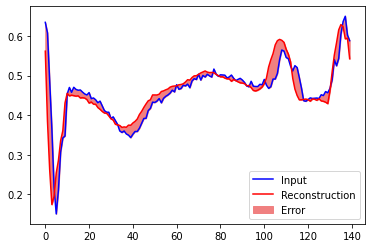

In [23]:
plt.plot(normal_test_data[20],'b')
plt.plot(normal_decoded[20],'r')
plt.fill_between(np.arange(140), normal_decoded[20], normal_test_data[20], color='lightcoral' )
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

* Anomalous ECG

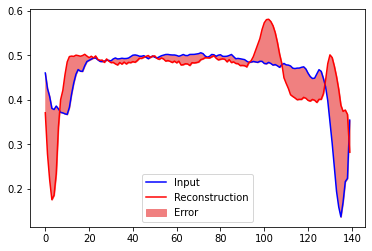

In [24]:
plt.plot(anomalous_test_data[20],'b')
plt.plot(anomaly_decoded[20],'r')
plt.fill_between(np.arange(140), anomaly_decoded[20], anomalous_test_data[20], color='lightcoral' )
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

### Detect anomalies:
Calculate whether the reconstruction loss is greater than a fixed threshold.Calculate the mean average error for normal examples from the training set, then classify future examples as anomalous if the reconstruction error is higher than one standard deviation from the training set.

* Plotting the reconstruction error from normal ECG

74/74 [==============================] - 0s 2ms/step


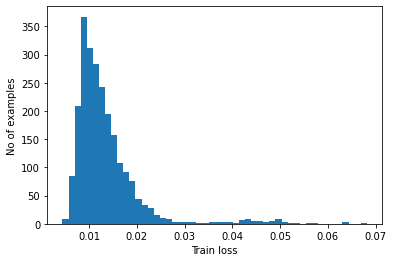

In [25]:
reconstructions = model.predict(normal_train_data)
train_loss = tf.keras.losses.mae(reconstructions, normal_train_data)

plt.hist(train_loss, bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

* Plotting the reconstruction error from anomalous ECG

14/14 [==============================] - 0s 2ms/step


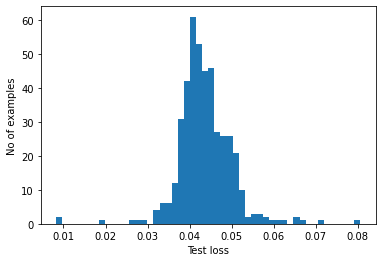

In [27]:
reconstructions = model.predict(anomalous_test_data)
test_loss = tf.keras.losses.mae(reconstructions, anomalous_test_data)

plt.hist(test_loss, bins=50)
plt.xlabel("Test loss")
plt.ylabel("No of examples")
plt.show()

In [26]:
# Choosing a threshold value that is 1 standard deviation above the mean

threshold = np.mean(train_loss) + np.std(train_loss)
print("Threshold: ", threshold)

Threshold:  0.02071191580961312


### Classifying an ECG as an anomaly if the reconstruction error is greater than the threshold.

In [28]:
from sklearn.metrics import accuracy_score

def predict(model, data, threshold):
  reconstructions = model(data)
  loss = tf.keras.losses.mae(reconstructions, data)
  return tf.math.less(loss, threshold)

preds = predict(model, test_data, threshold)
print("Accuracy = {}".format(accuracy_score(preds, y_test)))

Accuracy = 0.955


### **Observation:**
* #### Our autoencoder model is able to reconstruct the ECG images with an accuracy of 95%.
* #### Decreasing the number of epochs(like around 20-50) while training the model may decrease the performance of the model.
* #### Choosing the threshold value to classify a data sample as anomalous can be done many ways, we can adjust the precision and recall of our model by varying the threshold.